Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import scale

Reading the datasets

In [2]:
train=pd.read_csv('/content/train_v9rqX0R.csv')
test=pd.read_csv('/content/test_AbJTz2l.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#**Pre-processing on train data**

In [5]:
train.shape

(8523, 12)

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Handling Missing values

In [8]:
# Check for missing data
total = train.isnull().sum().sort_values(ascending=False)
print(total)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [9]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
train['Outlet_Size']=train['Outlet_Size'].fillna('Medium')

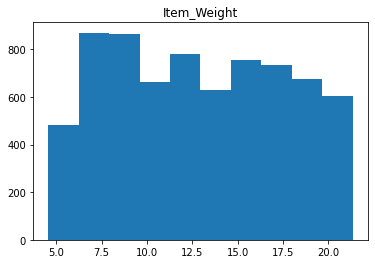

In [11]:
plt.hist(train['Item_Weight'])
plt.title("Item_Weight")
plt.show()

In [12]:
train['Item_Weight'].mean()

12.857645184135976

In [13]:
train['Item_Weight']=train['Item_Weight'].fillna(12.8576)

In [14]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Convert Categorical Data into Numbers

In [15]:
train['Item_Identifier'].nunique()

1559

In [16]:
train['Item_Fat_Content'].nunique()

5

In [17]:
train['Item_Type'].nunique()

16

In [18]:
train['Outlet_Identifier'].nunique()

10

In [19]:
train['Outlet_Size'].nunique()

3

In [20]:
train['Outlet_Location_Type'].nunique()

3

In [21]:
train['Outlet_Type'].nunique()

4

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])
train['Item_Identifier']=le.fit_transform(train['Item_Identifier'])
train['Item_Type']=le.fit_transform(train['Item_Type'])

train['Outlet_Type']=le.fit_transform(train['Outlet_Type'])
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])
train['Outlet_Identifier']=le.fit_transform(train['Outlet_Identifier'])

In [23]:
train.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

Standardisation

correlations

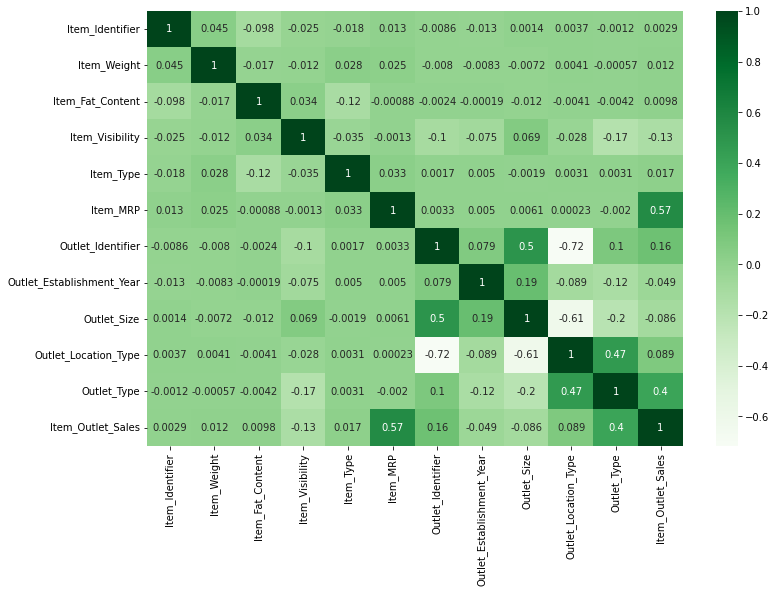

In [24]:
# Inspect feature correlations

plt.figure(figsize=(12,8))
ax = sns.heatmap(train.corr(), cmap='Greens', annot=True)
plt.show()

In [25]:
y_train=train['Item_Outlet_Sales']
x_train=train.drop('Item_Outlet_Sales',axis=1)

# **Pre-processing on test data**

In [26]:
test.shape

(5681, 11)

In [27]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [28]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Handling Missing values

In [29]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [30]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [31]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

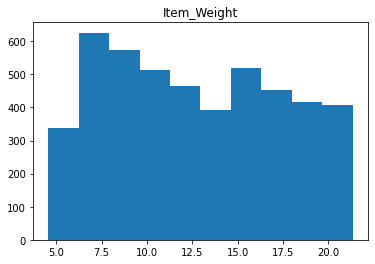

In [32]:
plt.hist(test['Item_Weight'])
plt.title("Item_Weight")
plt.show()

In [33]:
test['Item_Weight'].mean()

12.695633368756642

In [34]:
test['Item_Weight']=test['Item_Weight'].fillna(12.8576)

In [35]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Convert Categorical Data into Numbers

In [36]:
le=LabelEncoder()
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])
test['Item_Identifier']=le.fit_transform(test['Item_Identifier'])
test['Item_Type']=le.fit_transform(test['Item_Type'])

test['Outlet_Type']=le.fit_transform(test['Outlet_Type'])
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])
test['Outlet_Identifier']=le.fit_transform(test['Outlet_Identifier'])

In [37]:
test.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [38]:
x_test=test

# **Model Building and Evaluation**

Model 1:Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
prediction1= lr.predict(x_test)
prediction1=pd.DataFrame(prediction1,columns=['Item_Outlet_Sales']).abs()
prediction1

,Item_Outlet_Sales
0,2102.182954
1,1210.201560
2,2203.480395
3,2201.145931
4,5040.495767
...,...
5676,2262.939704
5677,2995.100299
5678,1851.448001
5679,3189.381415


In [40]:
sample=pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [52]:
sample['Item_Outlet_Sales']=prediction1['Item_Outlet_Sales'].values

In [56]:
pred_lin=sample
pred_lin

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2102.182954
1,FDW14,OUT017,1210.201560
2,NCN55,OUT010,2203.480395
3,FDQ58,OUT017,2201.145931
4,FDY38,OUT027,5040.495767
...,...,...,...
5676,FDB58,OUT046,2262.939704
5677,FDD47,OUT018,2995.100299
5678,NCO17,OUT045,1851.448001
5679,FDJ26,OUT017,3189.381415


In [55]:
pred_lin.to_csv('pred_lin.csv', index=False)

Model 2: Ridge regresion

In [58]:
#declare the ridge regression model
from sklearn.linear_model import Ridge
ridge=Ridge()

model2=ridge.fit(x_train,y_train)
prediction2=model2.predict(x_test)
prediction2=pd.DataFrame(prediction2,columns=['Item_Outlet_Sales']).abs()
sample['Item_Outlet_Sales']=prediction2['Item_Outlet_Sales'].values
pred_rrm=sample
pred_rrm

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2099.507035
1,FDW14,OUT017,1207.639172
2,NCN55,OUT010,2204.970424
3,FDQ58,OUT017,2197.750061
4,FDY38,OUT027,5044.070940
...,...,...,...
5676,FDB58,OUT046,2259.427198
5677,FDD47,OUT018,3000.382054
5678,NCO17,OUT045,1852.810768
5679,FDJ26,OUT017,3184.680118


In [60]:
pred_rrm.to_csv('pred_rrm.csv', index=False)

Model3: KNeighbors Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
# Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=12)
# Use the fit method on training data
model3=knn.fit(x_train, y_train)
prediction3=model3.predict(x_test)
prediction3=pd.DataFrame(prediction3,columns=['Item_Outlet_Sales']).abs()
sample['Item_Outlet_Sales']=prediction3['Item_Outlet_Sales'].values
pred_knn=sample

pred_knn.to_csv('pred_knn.csv', index=False)


Model 4:Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor
# Create an instance of the class
dt_reg = DecisionTreeRegressor(random_state=45,max_depth=15)
# Use the fit method on training data
model4=dt_reg.fit(x_train, y_train)
# Use the predict method on test data
prediction4=model4.predict(x_test)
prediction4=pd.DataFrame(prediction4,columns=['Item_Outlet_Sales']).abs()
sample['Item_Outlet_Sales']=prediction4['Item_Outlet_Sales'].values
pred_dectr=sample

pred_dectr.to_csv('pred_dectr.csv', index=False)

Model 5: Decision Tree Regressor 2

In [64]:
dt_reg = DecisionTreeRegressor(max_depth=16)
from sklearn.ensemble import BaggingRegressor
bg_regr = BaggingRegressor(base_estimator=dt_reg, n_estimators=200, random_state=123)
model5=bg_regr.fit(x_train,y_train)
prediction5=model5.predict(x_test)
prediction5=pd.DataFrame(prediction5,columns=['Item_Outlet_Sales']).abs()
sample['Item_Outlet_Sales']=prediction5['Item_Outlet_Sales'].values
pred_dectr2=sample

pred_dectr2.to_csv('pred_dectr2.csv', index=False)

Model 6: Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the class-
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=300)
# Use the fit method on training data
model6=rf_reg.fit(x_train, y_train)
prediction6=model6.predict(x_test)
prediction6=pd.DataFrame(prediction6,columns=['Item_Outlet_Sales'])
sample['Item_Outlet_Sales']=prediction6['Item_Outlet_Sales'].values
pred_randfor=sample

pred_randfor.to_csv('pred_randfor.csv', index=False)


Model 7: Gradient Boosting Regressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=400, max_depth=4, random_state=123)
model7=gbt.fit(x_train, y_train)
prediction7=model7.predict(x_test)
prediction7=pd.DataFrame(prediction7,columns=['Item_Outlet_Sales']).abs()
sample['Item_Outlet_Sales']=prediction7['Item_Outlet_Sales'].values
pred_boost=sample


pred_boost.to_csv('pred_boost.csv', index=False)
